In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mplfinance as mpf
import yfinance
import ta
from datetime import datetime
import config
import MetaTrader5 as mt5

# Initialize MT5

In [2]:
if not mt5.initialize(config.PATH,
                      login=config.USERNAME,
                      password=config.PASSWORD,
                      server=config.SERVER
                      ):
    print("initialize() failed")
    mt5.shutdown()
# request connection status and parameters
print(mt5.terminal_info())
# get data on MetaTrader 5 version
print(mt5.version())

TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=False, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=2715, maxbars=100000, codepage=0, ping_last=199143, community_balance=0.0, retransmission=1.706900755913192, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='English', path='C:\\Program Files\\MetaTrader 5', data_path='C:\\Users\\ChiChaChai\\AppData\\Roaming\\MetaQuotes\\Terminal\\D0E8209F77C8CF37AD8BF550E51FF075', commondata_path='C:\\Users\\ChiChaChai\\AppData\\Roaming\\MetaQuotes\\Terminal\\Common')
(500, 2715, '26 Nov 2020')


# Import data

In [3]:
eur_df = pd.DataFrame(mt5.copy_rates_range("XAUUSDm", mt5.TIMEFRAME_H1, datetime(2015, 12, 1), datetime.now()))
eur_df['time'] = pd.to_datetime(eur_df['time'], unit='s')
eur_df.set_index('time', inplace=True)
eur_df

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2015-12-01 00:00:00,1064.137,1074.523,1063.163,1069.819,106592,0,0
2015-12-02 00:00:00,1069.834,1070.488,1050.575,1054.043,116264,0,0
2015-12-03 00:00:00,1054.023,1065.340,1046.247,1063.126,163845,0,0
2015-12-04 00:00:00,1063.168,1088.690,1058.079,1086.763,138720,0,0
2015-12-06 00:00:00,1086.192,1086.192,1082.615,1083.073,3746,0,0
...,...,...,...,...,...,...,...
2020-12-11 17:00:00,1842.336,1843.237,1841.874,1841.874,3073,300,0
2020-12-11 18:00:00,1841.874,1842.489,1838.626,1840.605,3140,300,0
2020-12-11 19:00:00,1840.592,1840.897,1838.348,1838.712,3090,300,0


# Pre-processing

## Define target

In [4]:
df = eur_df.copy()
df = df.ffill()
df['return'] = df['close'].shift(-1) - df['close']

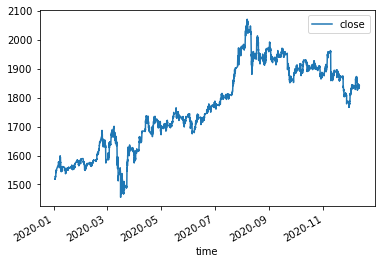

In [5]:
df.loc['2020-01-01':].plot(y='close')

In [6]:
df['next_close'] = df['close'].shift(-1)
df.tail(20)

,open,high,low,close,tick_volume,spread,real_volume,return,next_close
time,,,,,,,,,
2020-12-11 02:00:00,1840.088,1840.610,1836.744,1838.275,2763,300,0,-1.108,1837.167
2020-12-11 03:00:00,1838.266,1838.437,1834.705,1837.167,2482,300,0,0.328,1837.495
2020-12-11 04:00:00,1837.152,1838.077,1836.289,1837.495,1423,300,0,-2.829,1834.666
2020-12-11 05:00:00,1837.495,1838.520,1834.219,1834.666,2138,300,0,0.020,1834.686
2020-12-11 06:00:00,1834.666,1837.193,1833.369,1834.686,2681,300,0,-0.755,1833.931
2020-12-11 07:00:00,1834.711,1836.772,1832.621,1833.931,2907,300,0,-2.103,1831.828
2020-12-11 08:00:00,1833.977,1836.905,1831.510,1831.828,3857,300,0,5.092,1836.920
2020-12-11 09:00:00,1831.871,1837.584,1831.467,1836.920,4428,300,0,-4.927,1831.993
2020-12-11 10:00:00,1836.889,1839.519,1831.632,1831.993,4081,300,0,0.975,1832.968


In [7]:
df.dropna(inplace=True)

## Feature Engineering

In [8]:
from sklearn.preprocessing import StandardScaler

In [33]:
X = df[['open', 'high', 'low', 'close', 'tick_volume', 'spread']]
Y = df['next_close'].copy()

In [34]:
X['macd'] = ta.trend.MACD(X['close']).macd()

<ipython-input-34-63cda608d952>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['macd'] = ta.trend.MACD(X['close']).macd()


In [35]:
lookback_steps = [1, 2, 3, 5, 8]
ohlc = ['open', 'high', 'low', 'close']
lookback_cols = ohlc
for lookback in lookback_steps:
    lookback_features = X[lookback_cols].shift(lookback)
    lookback_features.rename(columns=lambda col: f'p{lookback}_{col}', inplace=True)
    X[lookback_features.columns] = lookback_features

c:\python38\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [36]:
Y = Y[~X.isna().any(axis=1)]
X = X[~X.isna().any(axis=1)]

In [37]:
feature_scaler = StandardScaler()
X.loc[:, X.columns] = feature_scaler.fit_transform(X)

target_scaler = StandardScaler()
Y[:] = target_scaler.fit_transform(np.expand_dims(Y.values, axis=1))[:, 0]

In [38]:
X_train = X.loc[:'2020-04-01']
Y_train = Y.loc[:'2020-04-01']

X_test = X.loc['2020-04-01':]
Y_test = Y.loc['2020-04-01':]

test_df = df.loc['2020-04-01':]

In [39]:


# X_timeseries = np.empty((len(X), len(lookback_steps)+1, 4), dtype=float)
# Y_timeseries = target_scaler.fit_transform(np.expand_dims(Y.values, axis=1))
# for timestep, lookback_step in enumerate(reversed(lookback_steps)):
#     X_timeseries[:, timestep, :] = X[[f'p{lookback_step}_{col}' for col in ohlc]]
# X_timeseries[:, -1, :] = X[ohlc]

# X_timeseries_train = X_timeseries[X.index.isin(X_train.index)]
# Y_timeseries_train = Y_timeseries[X.index.isin(X_train.index)]

# X_timeseries_test = X_timeseries[X.index.isin(X_test.index)]
# Y_timeseries_test = Y_timeseries[X.index.isin(X_test.index)]
class TimeseriesTransformer:
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_timeseries = np.empty((len(X), len(lookback_steps)+1, 4), dtype=float)
#         Y_timeseries = target_scaler.transform(np.expand_dims(Y.values, axis=1))
        for timestep, lookback_step in enumerate(reversed(lookback_steps)):
            X_timeseries[:, timestep, :] = X[[f'p{lookback_step}_{col}' for col in ohlc]]
        X_timeseries[:, -1, :] = X[ohlc]
        return X_timeseries
    
TimeseriesTransformer().transform(X).shape


(22628, 6, 4)

# Model building

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
import lightgbm as lgb

from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [41]:
def build_lstm_model():
    regressor = Sequential([
        LSTM(32, input_shape=(len(lookback_steps), len(lookback_cols)), activation='relu'),
        Dense(1)
    ])
    regressor.compile(optimizer='adam', loss='mse')
    return regressor


In [56]:
regressor = LinearRegression()
# regressor = RandomForestRegressor(n_estimators=16)
# regressor = SVR(kernel='linear')
# regressor = MLPRegressor(hidden_layer_sizes=100, )
# regressor = Pipeline([('TimeseriesTransformer', TimeseriesTransformer()),
#                       ('LSTM', KerasRegressor(build_fn=build_lstm_model,
#                                               epochs=10,
#                                               batch_size=32))
#                       ])

regressor.fit(X_train, Y_train)

LinearRegression()

In [57]:
prediction = regressor.predict(X_test)
prediction = target_scaler.inverse_transform(prediction)
test_df['prediction'] = prediction

<ipython-input-57-852cab15cfb3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['prediction'] = prediction


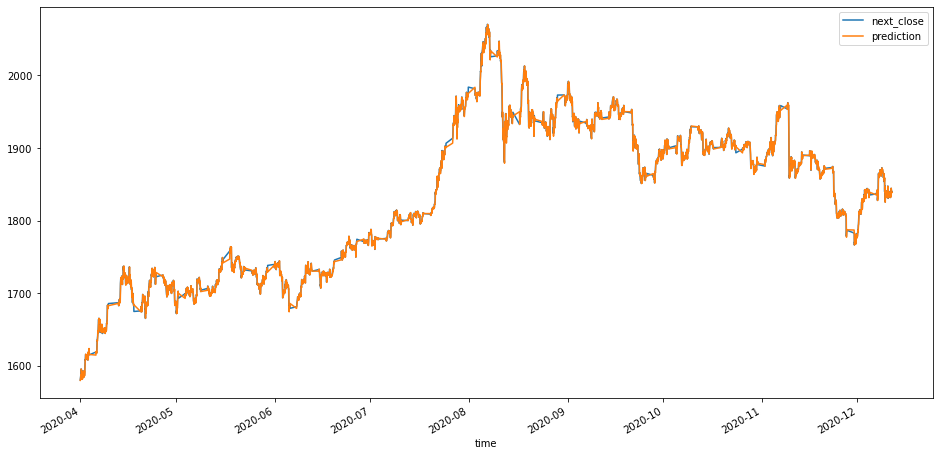

In [58]:
test_df.plot(y=['next_close', 'prediction'], figsize=(16, 8))

In [59]:
y_label = test_df['next_close']
y_pred = test_df['prediction']
test_mse = mean_squared_error(y_label, y_pred)
test_r2 = r2_score(y_label, y_pred)

print('MSE', test_mse)
print('R2', test_r2)

MSE 16.98147666703543
R2 0.9984257302334952


In [60]:
test_df['action'] = test_df['prediction'] > test_df['close']

<ipython-input-60-05558c8bed98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['action'] = test_df['prediction'] > test_df['close']


<ipython-input-61-2a26b8700529>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['margin'] = test_df['return']*test_df['action']


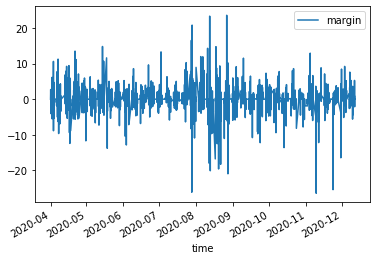

In [61]:
test_df['margin'] = test_df['return']*test_df['action']
test_df.plot(y='margin')


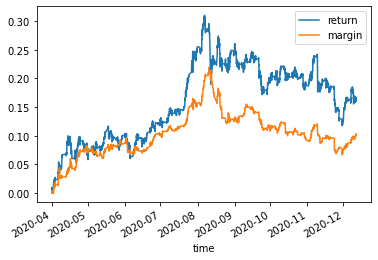

In [62]:
result = test_df[['return', 'margin']]
result = result / test_df['close'].values[0]


result.cumsum().plot()

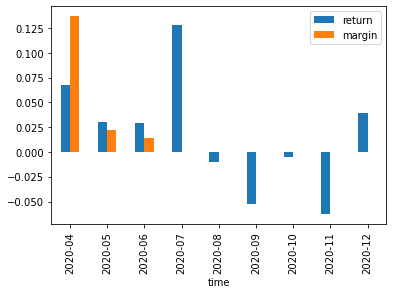

In [55]:
result.resample('M', kind='period').sum().plot(kind='bar')